<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Challenge" data-toc-modified-id="Challenge-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Challenge</a></span></li><li><span><a href="#Bode-Diagrams" data-toc-modified-id="Bode-Diagrams-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Bode Diagrams</a></span></li><li><span><a href="#What-a-Bode-Diagram-tells-us" data-toc-modified-id="What-a-Bode-Diagram-tells-us-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>What a Bode Diagram tells us</a></span><ul class="toc-item"><li><span><a href="#The-Bode-magnitude-plot" data-toc-modified-id="The-Bode-magnitude-plot-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>The Bode magnitude plot</a></span></li><li><span><a href="#The-Bode-phase-plot" data-toc-modified-id="The-Bode-phase-plot-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>The Bode phase plot</a></span></li><li><span><a href="#Summary:-Bode-Phase-Plots" data-toc-modified-id="Summary:-Bode-Phase-Plots-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Summary: Bode Phase Plots</a></span></li></ul></li><li><span><a href="#Exercises:-Due-Tuesday,-Nov.-30-by-MIDNIGHT" data-toc-modified-id="Exercises:-Due-Tuesday,-Nov.-30-by-MIDNIGHT-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercises: Due Tuesday, Nov. 30 by MIDNIGHT</a></span></li><li><span><a href="#Exercise-1:" data-toc-modified-id="Exercise-1:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercise 1:</a></span></li><li><span><a href="#Exercise-2" data-toc-modified-id="Exercise-2-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exercise 2</a></span></li><li><span><a href="#Exercise-3" data-toc-modified-id="Exercise-3-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Exercise 3</a></span></li></ul></div>

# Challenge

In today's challenge, you will learn how to both sketch and interpret a "Bode diagram," which shows us how a system's magnitude ratio and phase lag change for steady-state sinusoidal inputs as the input frequency $\omega$ varies.

We can use these tools to predict and interpret the behavior of any linear system, whether it is a control system, or just part of a control system (such as a filter or a plant model). 

For example, we can use Bode diagrams that were developed *experimentally* by testing a system at various frequencies to determine a plant transfer function! An example of this idea in action is shown in [this paper](https://www.researchgate.net/profile/Alexander_Brown12/publication/267709717_Frequency_Characteristics_and_Explanation_of_Notches_Seen_in_Frequency_Responses_of_Vehicles/links/5630d66508ae506cea6743e8.pdf). At Penn State, we (AAB and co-authors) often used sinusoidal tests to determine a vehicle's transfer function from steering angle to yaw rate by generating its Bode plot experimentally, and using this to find unknown physical vehicle parameters (such as yaw moment of inertia).

In the context of control system performance, we can use Bode plots to investigate how well our system might *reject sinusoidal noise or disturbances* in the input signal $u$, or *track sinusoidal reference inputs* $r$.

In summary, developing the skills to interpret and sketch Bode diagrams will allow us to make quick determinations about how a system might react to an input with a particular frequency without doing any complex calculation.

# Bode Diagrams

In the study of a stable, linear system's "steady-state" response to a sinusoidal input, it's possible to compute the system output's phase lag and magnitude ratio.

1. If a system represented by a transfer function $P(s)=\frac{y(s)}{u(s)}$ is subjected to a sinusoidal input $u(t) = Ucos\omega t$, the output of the system at steady state, $y_{ss}(t)$ is also a sinusoid with a different magnitude and phase angle than the input, but with the same frequency $\omega$.
2. The magnitude ratio $\frac{Y}{U}$ of the output sinusoid's amplitude to the input sinusoid's amplitude is $MR = \left|P(j\omega)\right|$. To find it, substitute $s=j\omega$ into the system transfer function $P(s)$ and find the magnitude of the resulting complex number.
3. The phase lag $\phi$ of the output sinusoid behind the input sinusoid is $\phi = \angle(P(j\omega))$. Find it by substituting $s=j\omega$ into the system transfer function $P(s)$ and finding the angle of the resulting complex number.



This allows us to find out how well our system either tracks or rejects sinusoidal inputs at steady state for a *particular* input frequency, but it is tedious to calculate the magnitude and phase response at a large number of frequencies (at least, without a computer). It is also true that if we **do not have a system's transfer function,** all we can do is run a battery of sinusoidal input tests to determine its MR and $\phi$ at a range of frequencies we are interested in.

In the 1940s [H.W. Bode](https://en.wikipedia.org/wiki/Hendrik_Wade_Bode) published extensively on the design of feedback amplifiers. As part of his work, he began plotting the steady-state magnitude and phase response of linear systems to sinusoidal  inputs on a logarithmic scale. Today, a set of two plots showing the magnitude and phase response of a linear system's steady-state response to sinusoidal inputs is called a "Bode plot" or "Bode diagram," and is ubiquitous in the system dynamics, controls, and signal processing literature. An example is shown below of the Bode plots of two different systems, one first order and one second order, using MATLAB/Octave to produce the plot for us. 

In [ ]:
clear all
s = tf('s');

P1 = 10/(s+1);
P2 = 10/(s^2+2*s+1);

bode(P1,P2)

The Bode plot above shows us the magnitude and phase of two systems' responses (one first order, the other critically-damped and second order) to sinusoidal inputs of varying frequencies **in radians per second**. The Magnitude plot shows a log-log scale in "decibels" for the y-axis, and radians per second for the x-axis. A magnitude ratio in decibels is defined as:

$$ G_{dB} = 20\log_{10}\frac{Y}{U}$$

Where, as before, the magnitude ratio for the system's steady-state response to a sinusoidal input of magnitude $U$ is $MR = \frac{Y}{U}$.

The Phase plot portion of the Bode diagram is usually shown in degrees, even though the x-axis is logarithmic in radians per second. The Bode plot may look esoteric at first glance, but several trends emerge if we study bode plots for systems we commonly encounter in control engineering. 

# What a Bode Diagram tells us

Looking at a Bode diagram's magnitude and phase plot tells us how the system reacts to steady-state sinusoidal inputs of various frequencies. But the diagram also can give us information about the system behavior. Many times, measuring the step response of a system with unknown dynamics doesn't yield much useful information about what its transfer function might be. Think about an overdamped second order system, for instance... how would you find both poles of the system by looking at the step response? It would be pretty hard! In these (and other) cases, subjecting the system to sinusoidal frequencies and plotting the resulting magnitude ratio and phase shift data on a plot can help you infer what the system's transfer function is. In cases where we are *designing* a transfer function, whether it's a filter or a control system, we can use the Bode diagram to tell us how the system will respond to inputs in a certain frequency spectrum. For designing a filter, we can make sure that the noise we want to attenuate has a satisfactorily small magnitude ratio. For a control system that is supposed to track sinusoidal inputs of a particular freqency, we can directly see how well our system will perform.

After reading this section, you should have an idea of:

1. How to interpret low and high frequency trends in the Bode magnitude plot
2. How to approximate the Bode magnitude plot of a known system transfer function using straight line "asymptotes" 
3. How to find the order, steady state gain, and pole locations of an unknown system transfer function by looking at its Bode plot (in other words, you can find higher-order transfer functions using data!)


## The Bode magnitude plot

If you look closely at the two plots above, you'll notice that the magnitude response of the first order system "rolls off" after the system's eigenvalue "a=1", and follows a log-linear, downward trend as $\omega$ gets large. If we were to plot the magnitude response on a linear scale in the y-axis, we would not see this linear trend. By looking at the plot, it appears that the magnitude response rolls off at $-20 \frac{dB}{decade}$, or by -20 decibels for every order of magnitude by which the frequency increases. This is actually the case for any first-order pole. As you might expect, the second-order pole in the second system causes a roll-off at $-40 \frac{dB}{decade}$, or twice as fast. Let's explore this mathematically for each of the two systems plotted above.

First, let's come up with an equation that expresses the magnitude ratio for the first-order system as frequency increases. Let's express the first-order transfer function $P_1(s) = \frac{10}{s+1}$ in more general terms, as $P_1(s) = \frac{A}{s+a} = \frac{\frac{A}{a}}{\frac{1}{a} s + 1} = \frac{A\tau}{\tau s + 1}$.

$$\frac{Y_1}{U} = \left|P_1(j\omega)\right| = \frac{\sqrt{\frac{A^2}{a^2}}}{\sqrt{\frac{1}{a}\omega^2+1}}$$

At low frequencies, close to zero, The magnitude response of the first-order system is therefore approximately $\frac{Y_1}{U} = \frac{A}{a}$, or in decibels, $G_{dB} = 20\log_{10}\frac{A}{a}$. In fact, this approximately describes the system's magnitude ratio all the way until we reach the system's eigenvalue at $a=1$ rad/s. **Therefore, a system's magnitude response is relatively flat until the sinusoidal input's frequency approaches a pole (or a zero)**. 

We can similarly calculate that for very large frequencies, on a logarithmic scale:

$$\lim_{\omega\rightarrow\infty}\left[\log_{10}\left|P_1(j\omega)\right|\right] = \lim_{\omega\rightarrow\infty}\left(\log_{10} \frac{\frac{A}{a}}{\sqrt{\frac{\omega^2}{a^2}+1}}\right) = \log_{10}\frac{A}{a}-\log_{10}\frac{\omega}{a}$$

This tells us that at high frequencies, the Bode magnitude plot follows a line on the log-log scale (if you need a refresher on the properties of logarithms, [here is one](http://dl.uncw.edu/digilib/mathematics/algebra/mat111hb/eandl/logprop/logprop.html)): 

$$\lim_{\omega\rightarrow\infty}\log_{10}\left|P_1(s)\right| = \log_{10}\frac{A}{a} - \log_{10}\frac{1}{a} - \log_{10}\omega$$ 

The first two terms in this equation for a line are constants, and the second term decreases with a slope of $20\frac{dB}{decade}$, because the "raw" (non-decibel) magnitude ratio decreases by $1$ for every power of 10 by which the excitation frequency increases. These two approximate "lines" that describe the magnitude plot,  the one from $\omega=0$ to $\omega=a$ and the second from $\omega=a$ to $\omega=\infty$, describe the "asymptotic approximation" for the Bode magnitude plot. Let's now look at the Bode magnitude plot for the first order system and draw the two "asymptotes" on top of it to see how they relate to the plot's overall shape. We'll draw the "low frequency" asymptote out to the pole at $s=-a$ (which is often called the "corner frequency" in the filtering literature) and then the "high frequency" asymptote from the corner frequency to the maximum frequency we show on the Bode plot.

In [ ]:
A = 10;
a = 1;
P1 = A/(s+a);
[mag1,phase1,w1] = bode(P1);%doesn't plot. We'll have to do that
%find frequencies less than the eigenvalue
lowfreq = w1(find(w1<=a));
%find frequencies higher than the eigenvalue
highfreq = w1(find(w1>=a));
%compute the two asymptotes, converting to decibels
asymp_high = 20*(log10(A/a) - log10(highfreq) - log10(1/a));
asymp_low = 20*log10(A/a)*ones(size(lowfreq)) ;
%plot results
semilogx(w1,20*log10(mag1))
hold on
semilogx(lowfreq,asymp_low,'k','LineWidth',5,highfreq,asymp_high,'r','LineWidth',5)
ylim([-20 30])
xlabel('frequency (rad/s)')
ylabel('Magnitude (dB)')
legend('MATLAB','Low Freq Asymptote','High Freq Asymptote')
grid on

Notice that the "asymptotic approximation" of the Bode magnitude plot for the first order system is pretty good, but is worst near the system's "corner frequency" or pole. However, if you were given a Bode magnitude plot for a system, or found one experimentally by subjecting a system to sinusoidal inputs, you could infer its transfer function by drawing an asymptotic approximation and looking for the "corner frequency" (pole) and steady state gain.

Next, let's look at the second order plant, $P_2(s)$. We'll once again look at this plant in a general form-- let's do this assuming that the plant is underdamped, which means it has a damping ratio $\zeta$ between zero and one. This means that we will write $P_2(s) = \frac{K\omega_n^2}{s^2+2\zeta\omega_n s + \omega_n^2}$. Substituting $s=j\omega$ into $P_2(s)$, we get:

$$P_2(j\omega) = \frac{{K\omega_n^2}}{(j\omega)^2+2\zeta\omega_n j\omega + (\omega_n)^2} = \frac{K}{1-\left(\frac{\omega}{\omega_n}\right)^2+j2\zeta\left(\frac{\omega}{\omega_n}\right)}$$

Now, looking at how the magnitude changes as a function of frequency, we get:

$$\left|P_2(j\omega)\right| = \frac{K}{\sqrt{\left[1-\left(\frac{\omega}{\omega_n}\right)^2\right]^2-\left[2\zeta\left(\frac{\omega}{\omega_n}\right)\right]^2}}$$

Once again, if we set $\omega=0$ in the above magnitude equation, we see lots of the complexity drop out, and we see that $\left|P_2(j\omega)\right|=K$ at low frequencies. At high frequencies, the magnitude equation becomes:

$$\lim_{\omega\rightarrow \infty}\left|P_2(j\omega)\right| = \lim_{\omega\rightarrow \infty} \frac{K}{\sqrt{\left[1-\left(\frac{\omega}{\omega_n}\right)^2\right]^2-\left[2\zeta\left(\frac{\omega}{\omega_n}\right)\right]^2}} = \log_{10}K - \log_{10}{\omega}^2 + \log_{10}\omega_n^2$$

Exploiting the properties of logarithms, specifically that $\log u^n=n\log u$, we find the high frequency asymptote for our second order system is:

$$\lim_{\omega\rightarrow \infty}\left|P_2(j\omega)\right|=\log_{10}K - 2\log_{10}{\omega} + 2\log_{10}\omega_n$$

Just as in the first order case, this is a line, but this time, its slope is $-40\frac{dB}{decade}$ on the decibel scale, or $-2$ on a simple log scale. In summary, a pole produces a high-frequency asymptote of $-20\frac{dB}{decade}$ *per order of the pole*.  Let's look at a comparison between the "asymptotic approximation" of the 2nd order Bode magnitude plot and the plot computed by MATLAB.

In [ ]:
s = tf('s');
wn = 1;
zeta = 1;
K = 10;
P2 = K*wn^2/(s^2+2*zeta*wn*s+wn^2);
[mag2,phase2,w2] = bode(P2);%doesn't plot. We'll have to do that
%find frequencies less than the eigenvalue
lowfreq = w2(find(w2<=wn));
%find frequencies higher than the eigenvalue
highfreq = w2(find(w2>=wn));
%compute the two asymptotes, converting to decibels
asymp_high = 20*(log10(K) - 2*log10(highfreq) + log10(wn));
asymp_low = 20*log10(K)*ones(size(lowfreq)) ;
%plot results
semilogx(w2,20*log10(mag2))
hold on
semilogx(lowfreq,asymp_low,'k','LineWidth',5,highfreq,asymp_high,'r','LineWidth',5)
ylim([-40 30])
xlabel('frequency (rad/s)')
ylabel('Magnitude (dB)')
legend('MATLAB','Low Freq Asymptote','High Freq Asymptote')
grid on

Again, we find that the asymptotic approximation of the Bode magnitude plot is very accurate except near the system's pole location(s). 

Through a similar analysis of the magnitude angle, we would find that a *zero* produces a high-frequency asymptote of $+20\frac{dB}{decade}$, as you can see in the example below of a second-order plant with a first-order zero. Note that the **net** high-frequency asymptote for the Bode plot is determined by the **net order** of the transfer function (order of the numerator minus order of the denominator). Also note that in the system below, the low damping ratio causes a "peak" in the Bode magnitude plot at the system's natural frequency.

In [ ]:
wn = 100;
zeta = 0.1;
z = 1;%system 1st order zero
K = 10*wn^2/z;%system steady state gain is the number in front of wn^2/z
P3 = K*(s+z)/(s^2+2*zeta*wn*s + wn^2);
[mag3,phase3,w3]=bode(P3);
%find frequencies less than the zero
lowfreq = w3(find(w3<=z));
%find frequencies higher than the zero but lower than the eigenvalue
midfreq = w3((w3>=z));
midfreq = midfreq(midfreq<=wn);
%find high frequencies
highfreq = w3(w3>=wn);
%compute the three asymptotes, converting to decibels
asymp_mid = 20*(log10(K*z/wn^2)+log10(midfreq));
asymp_high = 20*(log10(K*z/wn^2)+log10(wn) - log10(highfreq) + log10(wn));
asymp_low = 20*log10(K*z/wn^2)*ones(size(lowfreq)) ;
%plot results
semilogx(w3,20*log10(mag3))
hold on
semilogx(lowfreq,asymp_low,'k','LineWidth',5,midfreq,asymp_mid,'g','LineWidth',3,highfreq,asymp_high,'r','LineWidth',5)
%ylim([-40 30])
xlabel('frequency (rad/s)')
ylabel('Magnitude (dB)')
legend('MATLAB','Low Freq Asymptote','Mid Freq Asymptote','High Freq Asymptote')
grid on

This plot shows that at $\omega=1$ radian per second, the slope of the magnitude plot begins to increase, and reaches an asymptotic, linear growth until the system approaches the second eigenvalue at $\omega=100$ radians per second. At this point, the Bode magnitude plot reaches a maximum before "rolling off" with an asymptotic slope equal to 20 decibels per decade times the "net order" $n-m$ of the system, which is 1 (second order system with a first order zero).

**SUMMARY**

* The Bode magnitude plot for a linear system begins (at low frequency) at the system's steady state gain
* The Bode magnitude plot for a linear system shows an asymptotic $-20 \frac{dB}{decade}$ per order change in slope at each of the system transfer function's poles.
* The Bode magnitude plot for a linear system shows an asymptotic $20 \frac{dB}{decade}$ per order change in slope at each of the system transfer function's zeros.
* The "asymptotic approximation" of a Bode magnitude plot is least accurate near the zeros and poles of the system transfer function, but approximates the plot well otherwise.

**Why Do this?**

You can use this information to either determine the eigenvalues and/or system order of a system for which you have a Bode magnitude plot but no transfer function (or model), or to approximate the magnitude of a known system's frequency response for a range of excitation frequencies.

## The Bode phase plot

Let's look again at the very first system we studied in the last notebook, but this time, let's look carefully at the phase plot, which shows us how the system's steady-state sinusoidal output is shifted relative to the input. Remember that a negative phase angle means that the output of the system "lags behind" the input.

In [ ]:
s = tf('s');
A = 10;
a = 1;
P1 = A/(s+a);
bode(P1)

Visually, we can see that the first-order system's phase angle levels off at $-90^\circ$. We can also see that the system begins with a phase shift of $0^\circ$. It also looks like in general, the phase plot is relatively flat for small input frequencies and for high input frequencies, but that there's a downward slope between the "low frequency asymptote" and the "high frequency asymptote" that appears to be centered on the system's single pole at $1\frac{rad}{s}$.

These trends are confirmed by looking at the phase vs. frequency equation for each system. 

$$\phi_1 = \angle P_1(j\omega) = -\tan^{-1}\frac{\omega}{a}$$

At $\omega=0$, the phase shift will be zero. At the system's pole, the phase shift is $45^\circ$, and as the input frequency tends towards infinity, we see that this equation necessarily tends towards $-90^\circ$. In order to draw an "asymptotic approximation" of the phase angle plot, we need to know the slope of the portion of the plot that connects the low-freqency asymptote, which has a slope of 0, to the high-frequency asymptote, which also has a slope of 0. To accomplish this, we look at the derivative of the phase angle equation at the pole location with respect to the log of $\omega$. For any first order system, this will be given by:

$$\frac{d}{d\log_{10}\omega}\phi_1 = \frac{d\phi_1}{d\omega}\frac{d\omega}{d\log_{10}\omega} = -\log_e(10) \frac{\frac{\omega}{a}}{1+\frac{\omega^2}{a^2}}$$

This means that *evaluated at the corner frequency* $a$, the slope of the line tangent to the phase plot on a logarithmic (base $e$) frequency scale is $-\frac{1}{2}$, and that the slope of the line tangent to the phase plot on a log base 10 scale is $-\frac{1}{2}\log_e(10) \approx 1.15$. Remember that these slopes will be valid only if the plot has *radians* as the unit for the phase angle $\phi$. If the phase angle is plotted in degrees (as is the default for MATLAB/Octave), the slope will need to be scaled.

Because phase plots are often drawn on a log10 frequency scale, and because the phase drawn in degrees (even though frequencies are still usually in radians per second), the slope of the line $m$ on a standard Bode Plot is:

$$ m \approx - 1.15 \frac{rad}{log_{10}(\frac{rad}{s})} = -1.15  \frac{rad}{log_{10}(\frac{rad}{s})} \times \frac{180^\circ}{2\pi rad} \approx - 66 \frac{deg}{decade}$$

If we look at the Bode phase plot above, where $a=1\frac{rad}{s}$, and trace a line with this slope starting at $a$ and going 1 decade faster (to $10 \frac{rad}{s}$), we see that the value would be about $-111^\circ$. This is one way to approximate this portion of the Bode phase plot, but it is a bit cumbersome. Therefore, controls engineers have developed a simple rule:

**we can join the low-frequency asymptote to the high frequency asymptote by drawing a line from $0^\circ$ at $\omega=\frac{a}{5}$ to the high-frequency asymptote of $90^\circ$ at $\omega=5a$.**

Why is this? Because in order to traverse $45^\circ$ on the y-axis of our plot, given that the slope of the tangent line to the pole is about $-66^\circ$ per decade, we would need to traverse roughly $68\%$ of one "decade" (order of magnitude). This would bring us, in the example above where $a=1$, from $10^0$ rad/s to $10^{0.68}$ rad/s... which is roughly 5! We could see the same thing going from $a=10^0$ backwards $68\%$ of a decade to $10^{-0.68}$, which is about  0.2!!

To reiterate, this can be generalized for any first order pole of any frequency $a$, and leads to the following rule:

**we can join the low-frequency asymptote to the high frequency asymptote by drawing a line from $0^\circ$ at $\omega=\frac{a}{5}$ to the high-frequency asymptote of $90^\circ$ at $\omega=5a$.**

This is shown below using MATLAB. In general, any first-order pole on any transfer function will contribute an asymptote that changes the phase plot's slope by $-\frac{1}{2}\log_e(10)$ on the semilogarithmic phase plot, such that the asymptote passes through the pole, and any zero will contribute an asymptote with a slope of $\frac{1}{2}\log_e(10)$ on the semilogarithmic phase plot such that the asymptote passes through the zero. This is demonstrated below.

**Note that drawing asymptotic approximations of Bode plots in MATLAB is only useful for demonstrating how well or poorly these quick sketches approximate the "real deal." In general, you would only draw an asymptotic Bode plot if you did not have access to a computer**. The other reason to draw asymptotic approximations of Bode plots is to analyze a Bode plot generated from experimental data, or provided to you on a datasheet for a component you wish to use in a control system design.

In [ ]:
s = tf('s');
A = 10;
a = 1;
P1 = A/(s+a);
[mag1,phase1,w1] = bode(P1);

%asymptote will drop 90 degrees in 2 powers of 10 (slope of -1/2) or 45 degrees in 1, centered about the eigenvalue\
%log(a) - log(freq_low) = 1
%-> freq_low = 10^(log10(a)-1);
log_freq_low = a/5;
log_freq_high = 5*a;
log_freq_min = 10^-2;%minimum we want to plot
log_freq_max = 10^2;%maximum we want to plot
asymptotic_x = [log_freq_min log_freq_low log_freq_high log_freq_max];
asymptotic_y = [ 0 0 -90 -90];

% just for fun, double check the slope is correct! Draw just the tangent line in point-slope form
%line is in degrees, so we need to scale by 180/pi also
tangent_line = 180/pi*(log(10)*-1/2*(log10(w1)-log10(a))-pi/4);

semilogx(w1,phase1,asymptotic_x,asymptotic_y,'k','LineWidth',5,w1,tangent_line,'r','LineWidth',5)

grid on

Like the asymptotic approximation of the magnitude plot, the asymptotic approximation of the phase plot is imperfect. 

For any system that is a combination of real, stable poles, we know that the transfer function can be written as:

$$P(s) = \frac{K}{(s+p_1)(s+p_2)\cdots(s+p_n)} = \frac{K_1}{(s+p_1)}+\frac{K_2}{(s+p_2)}+\cdots+\frac{K_n}{(s+p_n)}$$

Therefore, we can say that the asymptotic approximation of the Bode phase (or magnitude) plot for the total system is simply the sum of the phase and/or magnitude plots from each of the first-order pieces. This is demonstrated below for an overdamped, second order system.

In [ ]:
a1 = 1;
a2 = 100;
P2 = 1/((s+a1)*(s+a2));

[mag,phase,w] = bode(P2);

%asymptotic approximations:
%for the first pole
log_freq_low_1 = a1/5;
log_freq_high_1 = 5*a1;
log_freq_min_1 = 10^-1;%minimum we want to plot
log_freq_max_1 = 10^3;%maximum we want to plot
asymptotic_x_1 = [log_freq_min_1 log_freq_low_1 log_freq_high_1 log_freq_max_1];
asymptotic_y_1 = [ 0 0 -90 -90];
%for the second pole
log_freq_low_2 = a2/5;
log_freq_high_2 = 5*a2;
log_freq_min_2 = 10^-1;%minimum we want to plot
log_freq_max_2 = 10^3;%maximum we want to plot
asymptotic_x_2 = [log_freq_min_2 log_freq_low_2 log_freq_high_2 log_freq_max_2];
asymptotic_y_2 = [ 0 0 -90 -90];

%now get each on the same frequency vector as the "real" bode plot so we can add them up.
%we do this using linear interpolation, which is "interp1" in MATLAB/Octave
wlin = sort([log_freq_min_1 log_freq_low_1 log_freq_high_1 log_freq_low_2 log_freq_high_2 log_freq_max_2]);
asymptotic_y_1_interp = interp1(asymptotic_x_1,asymptotic_y_1,(wlin),'linear');
asymptotic_y_2_interp = interp1(asymptotic_x_2,asymptotic_y_2,(wlin),'linear');

%now compute the total asymptotic by just adding those two plots together!
asymptotic_tot = asymptotic_y_1_interp+asymptotic_y_2_interp;

%now plot the results
semilogx(w,phase,wlin,asymptotic_y_1_interp,'g','LineWidth',5,wlin,asymptotic_y_2_interp,'r','LineWidth',5,wlin,asymptotic_tot,'k','LineWidth',5)
legend('Octave','Asymptotic for pole 1','Asymptotic for pole 2','Total')
xlabel('Frequency (rad/s)')
ylabel('Phase Shift (deg)')

Similarly to the magnitude plot, a simple, negative, real zero contributes the opposite trend to the phase plot as a simple pole. This is shown in the example below, which has one zero and two poles. The asymptotic plot is not shown, but the procedure for constructing it is the same.

In [ ]:
P = (s+1)/((s+100)*(s+10000));
[mag,phase,w] = bode(P);
semilogx(w,phase,'k','LineWidth',5)
xlabel('Frequency (rad/s)')
ylabel('Phase Shift (deg)')

The story changes significantly if our system  has an underdamped, second-order pole. Let's look at the phase equation for the following prototype second-order underdamped system:

$$P_2(s) = \frac{\omega_n^2}{s^2+2\zeta\omega_ns+\omega_n^2}$$

The phase equation for this system is:

$$\phi_2= \angle P_2(j\omega) = -\tan^{-1}\frac{2\zeta\frac{\omega}{\omega_n}}{1-\left(\frac{\omega}{\omega_n}\right)^2}$$

We can see that at very low frequencies, $\phi=0^\circ$, and at very high frequencies, $\phi=-180^\circ$. Finally, at $\omega=\omega_n$, $\phi=-90^\circ$. 

If $\zeta=1$, the slope of the tangent line at $\omega=\omega_n$ is $-1$ on a logarithmic scale, meaning that the asymptote connecting the $0^\circ$ low-frequency asymptote to the $-180^\circ$ high-frequency asymptote can be drawn by connecting the $0^\circ$ line at $\omega=\frac{\omega_n}{5}$ to the $-180^\circ$ line at $\omega=5\omega_n$.

However, if $\zeta<1$, the slope of the tangent line gets steeper, and is harder to calculate quickly. Therefore, many texts suggest just using the $\zeta=1$ tangent line for quick sketches, although it is not all that accurate. Bode plots for second-order systems at varying damping ratios are shown below.

In [ ]:
zetas = .1:.1:1;
wn = 1;
w = logspace(-2,2,100);
magvec = zeros(length(zetas),length(w));
phasevec = zeros(length(zetas),length(w));
for k = 1:length(zetas)
    P = wn^2/(s^2+2*zetas(k)*wn*s+wn^2);
    [mag,phase] = bode(P,w);
    magvec(k,:) = mag;
    phasevec(k,:) = phase;
    legendinfo{k} = ['zeta = ' num2str(zetas(k))];
end
figure
subplot(2,1,1)
semilogx(w,20*log10(magvec))
ylabel('Magnitude Ratio (dB)')
subplot(2,1,2)
semilogx(w,phasevec)
legend(legendinfo)
xlabel('frequency (rad/s)')
ylabel('Phase shift (degrees)')

As before, a zero has the same effect as a pole, but with an opposite sign to the slope. So an underdamped second-order zero produces low and high frequency asymptotes at $0^\circ$ and $180^\circ$ respectively, which a slope that increases with decreasing $\zeta$.

## Summary: Bode Phase Plots

* The Bode phase plot for a first-order system has a flat asymptote at $0^\circ$ for low frequencies, and a flat asymptote at $-90^\circ$ at high frequencies. It passes through the point $a,-45^\circ$ with a slope of $-\frac{1}{2}\log_e(10)$ on the log scale. To draw the line connecting the low frequency asymptote with the high frequency asymptote, draw a line from $0^\circ$ at $\omega=\frac{a}{5}$ to $90^\circ$ at $\omega=5a$.
* Asymptotic approximations of the Bode phase plots for systems composed of real poles and zeros can be constructed by adding together the asymptotic approximations for the phase plots of each pole and/or zero.
* For underdamped second-order poles, the phase plot has a flat low-frequency asymptote at $0^\circ$, a flat high-frequency asymptote at $-180^\circ$, and a slope at $\omega=\omega_n$ of $-1\log_e(10)$ on a logarithmic scale for $\zeta=1$. The slope of the asymptote connecting the low and high-frequency lines gets steeper with decreasing $\zeta$.
* Zeros produce phase plots that increase (rather than decrease) with increasing frequency, but the shape of the asymptotic approximations follows the same trend (with opposite sign) as the asymptotic approximations for poles.

# Exercises: Due Tuesday, Nov. 30 by MIDNIGHT



# Exercise 1:

Based on the Following Bode magnitude diagram, find the system transfer function. To complete this, you have two options:

1. Print this plot out and show your work in the markdown cell below. 
2. If you cannot print the plot out, you can snip it and use draw.io to sketch on top of it and find your coner frequency/frequencies. To do this, you will need to select the image in draw.io, click "properties" and **un-check** both "selectable" and "allow arrows" so that you can freely draw lines on top of the image.

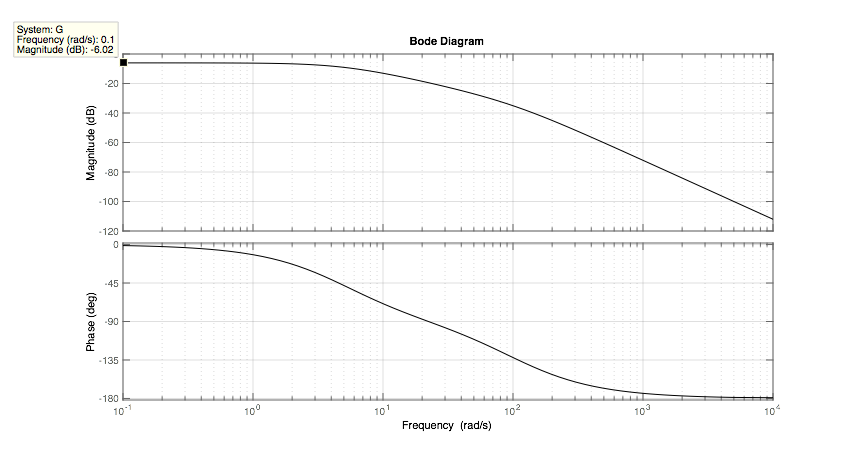

YOUR ANSWER HERE

# Exercise 2

Sketch the asymptotic Bode magnitude plot for the following system. Show your work and results in the Markdown cell below. Check your work using the "Bode" command in the Octave cell below. You **do not** have to sketch the phase plot.

$$P(s) = \frac{1200(s+10)}{(s+1)(s+1000)}$$

YOUR ANSWER HERE

In [ ]:
% YOUR CODE HERE
error('No Answer Given!')

# Exercise 3

Sketch the asymptotic Bode magnitude plot for the following system. Show your work and results in the Markdown cell below. Check your work using the "Bode" command in the Octave cell below. You **do not** have to sketch the phase plot.


$$P(s) = \frac{1200(s+10)}{s(s+1)(s+1000)}$$

YOUR ANSWER HERE

In [ ]:
% YOUR CODE HERE
error('No Answer Given!')